# Resnet 18 Only last Fully Connected Layer is modified

training epoch 1
Loss: 1.7858, Train Accuracy: 0.5428
Test Accuracy: 0.6229
training epoch 2
Loss: 0.8064, Train Accuracy: 0.7587
Test Accuracy: 0.6268
training epoch 3
Loss: 0.4196, Train Accuracy: 0.8767
Test Accuracy: 0.6851
training epoch 4
Loss: 0.1818, Train Accuracy: 0.9580
Test Accuracy: 0.7111
training epoch 5
Loss: 0.0784, Train Accuracy: 0.9867
Test Accuracy: 0.7310
training epoch 6
Loss: 0.0393, Train Accuracy: 0.9957
Test Accuracy: 0.7570
training epoch 7
Loss: 0.0232, Train Accuracy: 0.9975
Test Accuracy: 0.7563
training epoch 8
Loss: 0.0192, Train Accuracy: 0.9972
Test Accuracy: 0.7573
training epoch 9
Loss: 0.0144, Train Accuracy: 0.9974
Test Accuracy: 0.7556
training epoch 10
Loss: 0.0119, Train Accuracy: 0.9974
Test Accuracy: 0.7600
Best class index: 5, accuracy: 100.00%


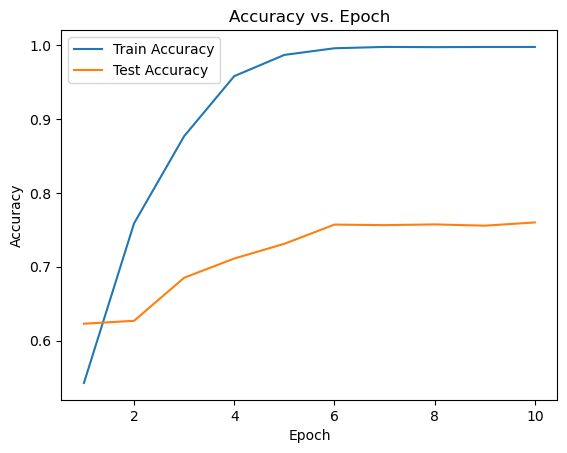

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision.models import ResNet18_Weights
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# preprocessing
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),          # Convert to Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize
])

# Load dataset
data_dir = 'Images' 
full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Define the size of the training and test sets
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# Randomly split the dataset
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load pre-trained ResNet-18 model
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

# Modify the final fully connected layer to suit the new classification task
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))

# Move the model to GPU (if available)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1) 

# Record training and test accuracy for each epoch
train_accuracy_list = []
test_accuracy_list = []

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    print(f'training epoch {epoch+1}')
    model.train()
    running_loss = 0.0
    corrects_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        corrects_train += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    train_accuracy = corrects_train.float() / len(train_dataset)
    train_accuracy_list.append(train_accuracy.item())
    print(f'Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')

    # Update learning rate
    scheduler.step()

    # Evaluate the model and print test accuracy at the end of each epoch
    model.eval()
    corrects_test = 0
    class_correct = [0 for _ in range(len(full_dataset.classes))]
    class_total = [0 for _ in range(len(full_dataset.classes))]
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects_test += torch.sum(preds == labels.data)

            for i in range(len(labels)):
                label = labels[i]
                pred = preds[i]
                if label == pred:
                    class_correct[label] += 1
                class_total[label] += 1

    test_accuracy = corrects_test.float() / len(test_dataset)
    test_accuracy_list.append(test_accuracy.item())
    print(f'Test Accuracy: {test_accuracy:.4f}')

class_accuracy = [100 * class_correct[i] / class_total[i] for i in range(len(full_dataset.classes))]
best_class = np.argmax(class_accuracy)
print(f'Best class index: {best_class}, accuracy: {class_accuracy[best_class]:.2f}%')

# Plot accuracy vs. epoch
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.show()


# Resnet 18, 2 extra Fully Connected layers are added.

training epoch 1
Loss: 3.5734, Train Accuracy: 0.1636
Test Accuracy: 0.4446

training epoch 2
Loss: 2.0320, Train Accuracy: 0.4116
Test Accuracy: 0.5085

training epoch 3
Loss: 1.6132, Train Accuracy: 0.5141
Test Accuracy: 0.5600

training epoch 4
Loss: 1.3483, Train Accuracy: 0.5820
Test Accuracy: 0.5520

training epoch 5
Loss: 1.1831, Train Accuracy: 0.6328
Test Accuracy: 0.5644

training epoch 6
Loss: 1.0352, Train Accuracy: 0.6740
Test Accuracy: 0.5559

training epoch 7
Loss: 0.9206, Train Accuracy: 0.7085
Test Accuracy: 0.5510

training epoch 8
Loss: 0.5204, Train Accuracy: 0.8278
Test Accuracy: 0.6905

training epoch 9
Loss: 0.3592, Train Accuracy: 0.8774
Test Accuracy: 0.6939

training epoch 10
Loss: 0.2956, Train Accuracy: 0.9019
Test Accuracy: 0.6936



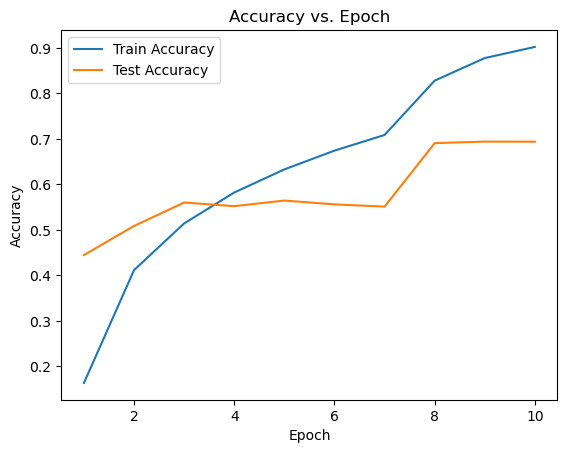

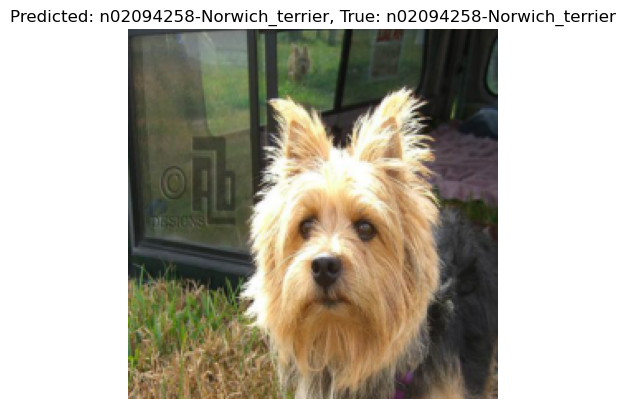

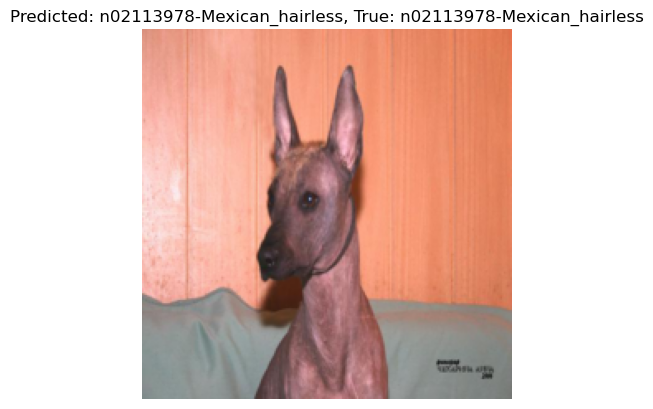

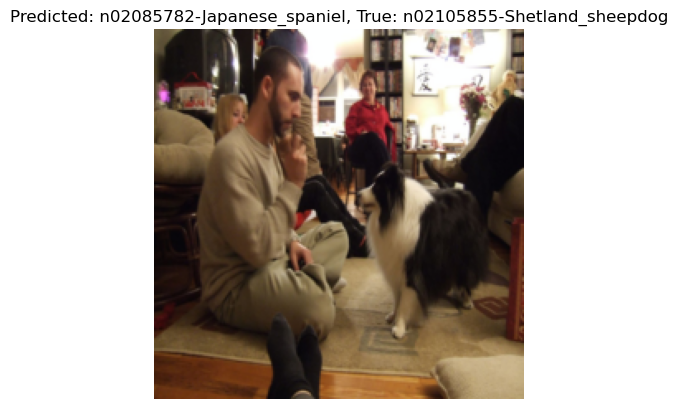

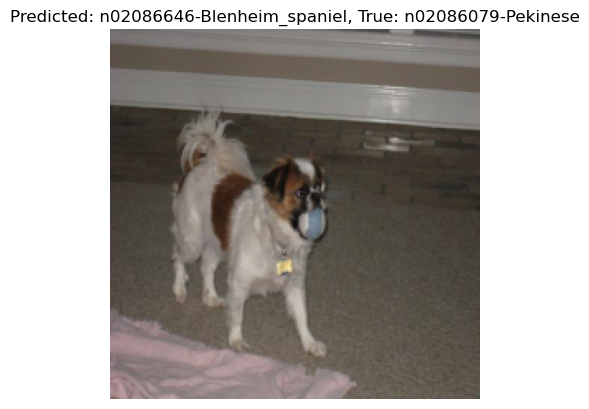

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision.models import ResNet18_Weights
import numpy as np
import matplotlib.pyplot as plt

# preprocessing
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),          # Convert to Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize
])

# Load dataset
data_dir = 'Images'  
full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Define the size of the training and test sets
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# Randomly split the dataset
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load pre-trained ResNet-18 model
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

# Modify the final fully connected layer to suit the new classification task, adding fully connected layers
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, len(full_dataset.classes))
)

# Move the model to GPU (if available)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)  

# Record training and test accuracy for each epoch
train_accuracy_list = []
test_accuracy_list = []

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    print(f'training epoch {epoch+1}')
    model.train()
    running_loss = 0.0
    corrects_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        corrects_train += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    train_accuracy = corrects_train.float() / len(train_dataset)
    train_accuracy_list.append(train_accuracy.item())
    print(f'Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')

    # Update learning rate at the end of each epoch
    scheduler.step()

    # Evaluate the model and print test accuracy at the end of each epoch
    model.eval()
    corrects_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects_test += torch.sum(preds == labels.data)

    test_accuracy = corrects_test.float() / len(test_dataset)
    test_accuracy_list.append(test_accuracy.item())
    print(f'Test Accuracy: {test_accuracy:.4f}')

    print('')

# Plot accuracy vs. epoch
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.show()

# display an image and its prediction
def imshow(image_tensor, title=None):
    image_tensor = image_tensor.numpy().transpose((1, 2, 0))  # Convert to (H, W, C)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image_tensor = std * image_tensor + mean  # Denormalize
    image_tensor = np.clip(image_tensor, 0, 1)
    plt.imshow(image_tensor)
    if title is not None:
        plt.title(title)
    plt.axis('off')
    plt.show()

inputs, classes = next(iter(test_loader))
inputs, classes = inputs.to(device), classes.to(device)
outputs = model(inputs)
_, preds = torch.max(outputs, 1)

for j in range(4):
    imshow(inputs.cpu().data[j], title=f'Predicted: {full_dataset.classes[preds[j]]}, True: {full_dataset.classes[classes[j]]}')


# Use the annotation file

In [7]:
import os
import xml.etree.ElementTree as ET
from PIL import Image

def resize_image_based_on_annotation(image_dir, annotation_dir, output_dir, target_size=(224, 224)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Traverse each breed directory in the annotation directory
    for breed_dir in os.listdir(annotation_dir):
        breed_annotation_path = os.path.join(annotation_dir, breed_dir)
        breed_image_path = os.path.join(image_dir, breed_dir)
        breed_output_path = os.path.join(output_dir, breed_dir)
        
        if not os.path.exists(breed_output_path):
            os.makedirs(breed_output_path)

        # Ensure that the corresponding image directory exists
        if os.path.isdir(breed_annotation_path) and os.path.isdir(breed_image_path):
            # Process each XML file within the breed annotation directory
            for filename in os.listdir(breed_annotation_path):
                annotation_path = os.path.join(breed_annotation_path, filename)
                image_file = filename.split('.')[0] + '.jpg'
                image_path = os.path.join(breed_image_path, image_file)

                tree = ET.parse(annotation_path)
                root = tree.getroot()
                    
                # Extract bounding box coordinates
                bndbox = root.find('.//bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)
                
                if os.path.exists(image_path):
                    with Image.open(image_path) as img:
                        # Crop the image to the bounding box
                        cropped_img = img.crop((xmin, ymin, xmax, ymax))
                            
                        # Resize the image
                        resized_img = cropped_img.resize(target_size, Image.LANCZOS)
                        
                        if resized_img.mode == 'RGBA':
                            resized_img = resized_img.convert('RGB')
                        
                        # Save the resized image
                        output_image_path = os.path.join(breed_output_path, image_file)
                        resized_img.save(output_image_path, format='JPEG')

image_dir = './Images/'
annotation_dir = './Annotation/'
output_dir = './annotated_images'

resize_image_based_on_annotation(image_dir=image_dir, annotation_dir=annotation_dir, output_dir=output_dir)

training epoch 1
Loss: 1.5900, Train Accuracy: 0.5904
Test Accuracy: 0.6946
training epoch 2
Loss: 0.6209, Train Accuracy: 0.8155
Test Accuracy: 0.7330
training epoch 3
Loss: 0.3234, Train Accuracy: 0.9071
Test Accuracy: 0.7464
training epoch 4
Loss: 0.1418, Train Accuracy: 0.9686
Test Accuracy: 0.7770
training epoch 5
Loss: 0.0610, Train Accuracy: 0.9916
Test Accuracy: 0.7850
training epoch 6
Loss: 0.0304, Train Accuracy: 0.9972
Test Accuracy: 0.7981
training epoch 7
Loss: 0.0178, Train Accuracy: 0.9985
Test Accuracy: 0.7988
training epoch 8
Loss: 0.0129, Train Accuracy: 0.9988
Test Accuracy: 0.7920
training epoch 9
Loss: 0.0086, Train Accuracy: 0.9995
Test Accuracy: 0.8005
training epoch 10
Loss: 0.0060, Train Accuracy: 0.9999
Test Accuracy: 0.7971
Best class index: 31, accuracy: 100.00%


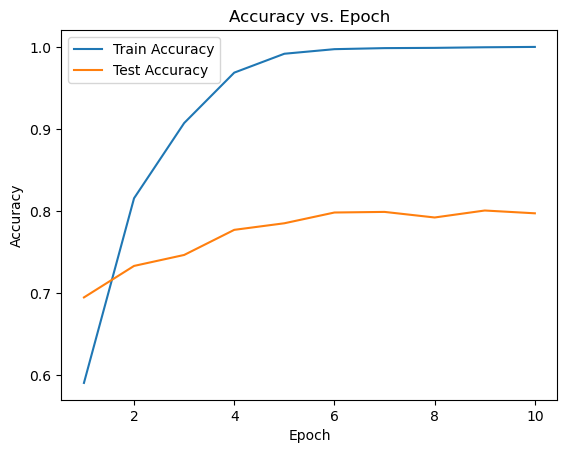

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision.models import ResNet18_Weights
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# preprocessing
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),          # Convert to Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize
])

# Load dataset
data_dir = 'annotated_images'  # only need to change the folder's name
full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Define the size of the training and test sets
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# Randomly split the dataset
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load pre-trained ResNet-18 model
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

# Modify the final fully connected layer to suit the new classification task
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))

# Move the model to GPU (if available)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1) 

# Record training and test accuracy for each epoch
train_accuracy_list = []
test_accuracy_list = []

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    print(f'training epoch {epoch+1}')
    model.train()
    running_loss = 0.0
    corrects_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        corrects_train += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    train_accuracy = corrects_train.float() / len(train_dataset)
    train_accuracy_list.append(train_accuracy.item())
    print(f'Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')

    # Update learning rate
    scheduler.step()

    # Evaluate the model and print test accuracy at the end of each epoch
    model.eval()
    corrects_test = 0
    class_correct = [0 for _ in range(len(full_dataset.classes))]
    class_total = [0 for _ in range(len(full_dataset.classes))]
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects_test += torch.sum(preds == labels.data)

            for i in range(len(labels)):
                label = labels[i]
                pred = preds[i]
                if label == pred:
                    class_correct[label] += 1
                class_total[label] += 1

    test_accuracy = corrects_test.float() / len(test_dataset)
    test_accuracy_list.append(test_accuracy.item())
    print(f'Test Accuracy: {test_accuracy:.4f}')

class_accuracy = [100 * class_correct[i] / class_total[i] for i in range(len(full_dataset.classes))]
best_class = np.argmax(class_accuracy)
print(f'Best class index: {best_class}, accuracy: {class_accuracy[best_class]:.2f}%')

# Plot accuracy vs. epoch
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.show()


# Annotated with multiple fc and data augumentation

training epoch 1
Loss: 4.3300, Train Accuracy: 0.0564
Test Accuracy: 0.1837

training epoch 2
Loss: 3.0486, Train Accuracy: 0.2158
Test Accuracy: 0.3489

training epoch 3
Loss: 2.7223, Train Accuracy: 0.2814
Test Accuracy: 0.3829

training epoch 4
Loss: 2.5672, Train Accuracy: 0.3152
Test Accuracy: 0.4050

training epoch 5
Loss: 2.4299, Train Accuracy: 0.3509
Test Accuracy: 0.4327

training epoch 6
Loss: 2.3648, Train Accuracy: 0.3667
Test Accuracy: 0.4373

training epoch 7
Loss: 2.2934, Train Accuracy: 0.3865
Test Accuracy: 0.4555

training epoch 8
Loss: 2.2080, Train Accuracy: 0.4043
Test Accuracy: 0.4529

training epoch 9
Loss: 2.1885, Train Accuracy: 0.4126
Test Accuracy: 0.4689

training epoch 10
Loss: 2.1460, Train Accuracy: 0.4202
Test Accuracy: 0.4631



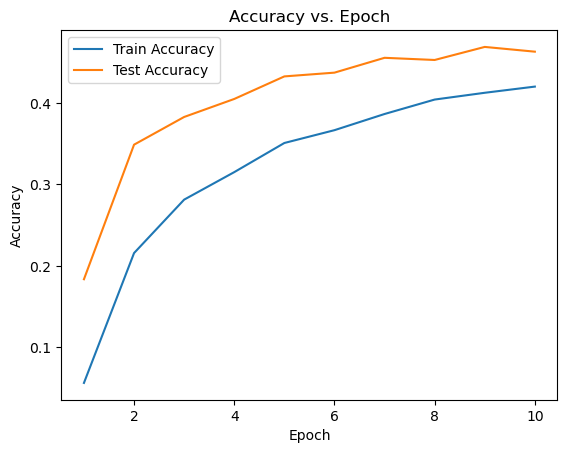

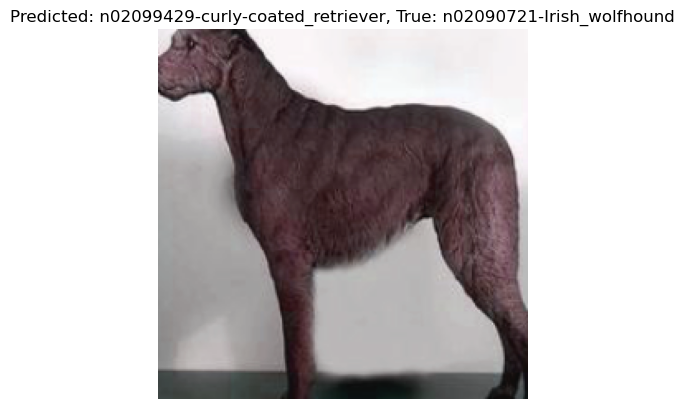

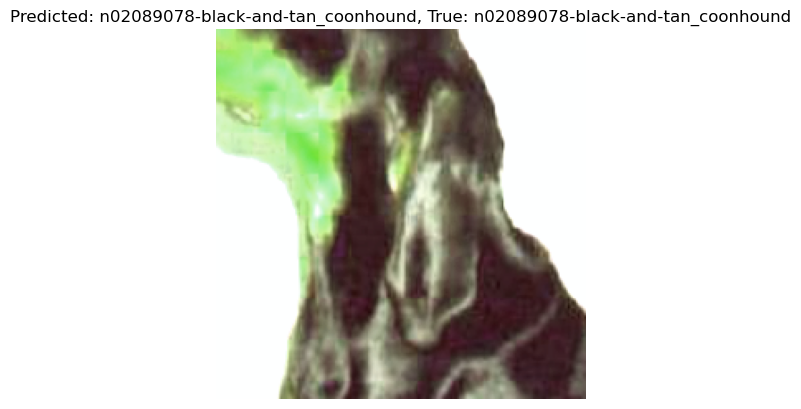

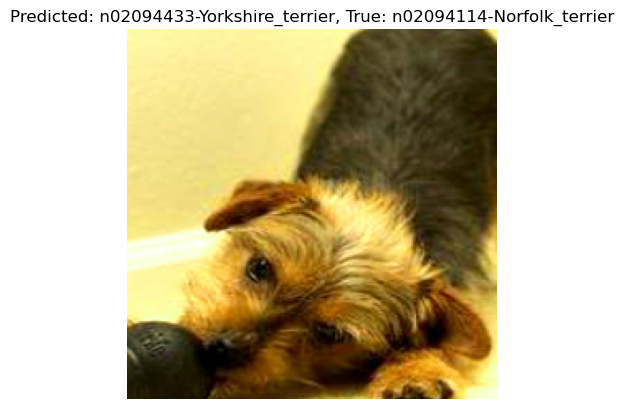

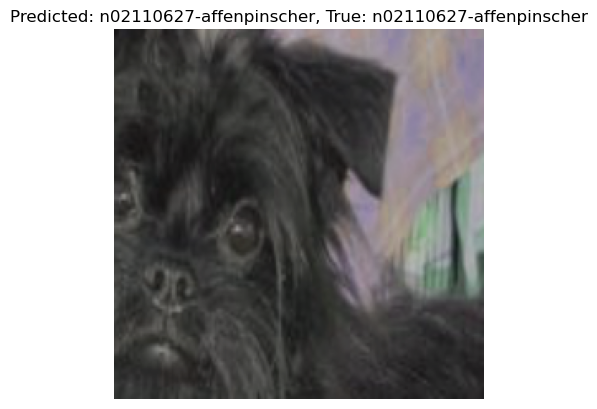

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision.models import ResNet18_Weights
import numpy as np
import matplotlib.pyplot as plt

# preprocessing and data augumentation
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),   # Randomly crop and resize
    transforms.RandomHorizontalFlip(),   # Random horizontal flip
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),  # Color jitter
    transforms.ToTensor(),               # Convert to Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize
])

# Load dataset
data_dir = 'annotated_images'  
full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Define the size of the training and test sets
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# Randomly split the dataset
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load pre-trained ResNet-18 model
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

# Modify the final fully connected layer to suit the new classification task
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, len(full_dataset.classes))
)

# Move the model to GPU (if available)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Record training and test accuracy for each epoch
train_accuracy_list = []
test_accuracy_list = []

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    print(f'training epoch {epoch+1}')
    model.train()
    running_loss = 0.0
    corrects_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        corrects_train += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    train_accuracy = corrects_train.float() / len(train_dataset)
    train_accuracy_list.append(train_accuracy.item())
    print(f'Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')

    # Update learning rate at the end of each epoch
    scheduler.step()

    # Evaluate the model and print test accuracy at the end of each epoch
    model.eval()
    corrects_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects_test += torch.sum(preds == labels.data)

    test_accuracy = corrects_test.float() / len(test_dataset)
    test_accuracy_list.append(test_accuracy.item())
    print(f'Test Accuracy: {test_accuracy:.4f}')

    print('')

# Plot accuracy vs. epoch
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.show()

# display an image and its prediction
def imshow(image_tensor, title=None):
    image_tensor = image_tensor.numpy().transpose((1, 2, 0)) 
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image_tensor = std * image_tensor + mean  
    image_tensor = np.clip(image_tensor, 0, 1)
    plt.imshow(image_tensor)
    if title is not None:
        plt.title(title)
    plt.axis('off')
    plt.show()

inputs, classes = next(iter(test_loader))
inputs, classes = inputs.to(device), classes.to(device)
outputs = model(inputs)
_, preds = torch.max(outputs, 1)

for j in range(4):
    imshow(inputs.cpu().data[j], title=f'Predicted: {full_dataset.classes[preds[j]]}, True: {full_dataset.classes[classes[j]]}')
